input X =  <TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  1
  -
  s
transfer function =  <TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    1
  -----
  s + 1
output Y =  <TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     1
  -------
  s^2 + s
input pulse =  <TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  1
  -
  s
plant transfer function =  <TransferFunction>: sys[3]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     -1.523
  -------------
  s^2 + 89.29 s
output Y =  <TransferFunction>: sys[5]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      -1.523
  ---------------
  s^3 + 89.29 s^2
input pulse =  <TransferFunction>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = None

  1
  -
  1
plant transfer function =  <TransferFunction>: sys[3]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     -1.523
  -------------
  s^2 + 89.29 s
output Y =  <TransferFunction>: sys[7]
Inputs (1): ['u[0]']


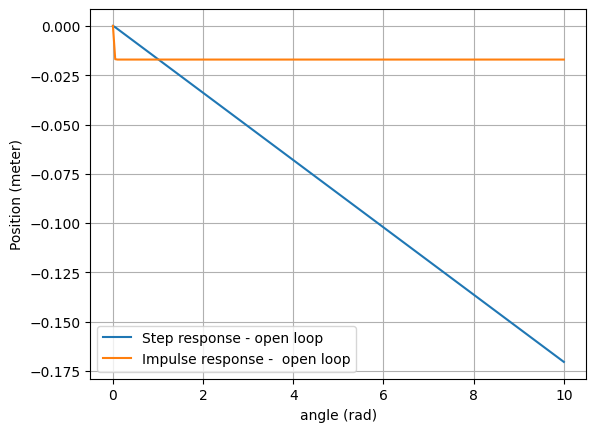

In [2]:
import array
import control
import numpy as np
from control import *
import matplotlib.pyplot as plt


#G = tf([1], [1, 2]) #could be example of simple 1st order motor or RC low pass filter
G=tf(1, [1, 1])
#responsie output Y(s) op step input X(s)
X=tf([1],[1,0])   #step input 1/s
Y=G*X             #calculate output
print('input X = ',X)
print('transfer function = ',G)
print('output Y = ',Y)

# maybe change it to be theta and not alpha, because maybe not really plant.
# open loop plant (idk if cool?)
g = 9.81
d = 0.0375
L = 0.1725
b = 0.1 # total guess
m = 0.04 # weight of ball
R = 0.02

num = [-5/7*g*(d/L)] # this technically maps to alpha, that is, the angle of the motor, not that of the beam.
den = [1, (5*b)/(7*m*R), 0]

G_plant = tf(num, den)

# step response and pulse response:
step =tf([1],[1,0])
Y_step = G_plant * step
pulse =tf([1],[1])
Y_pulse = G_plant * step

# show actual equations
print('input pulse = ', step)
print('plant transfer function = ', G_plant)
print('output Y = ', Y_step)
print('input pulse = ', pulse)
print('plant transfer function = ', G_plant)
print('output Y = ', Y_pulse)

#open loop response = the system's output behavior without any feedback, measured after a step change in the systems input (= at the controller's output )
t,y = step_response(G_plant,T=10,T_num=200, X0=0)     #X0 can be set as initial condition
t2,yc = impulse_response(G_plant,T=10,T_num=200)
plt.plot(t,y, label='Step response - open loop')
plt.plot(t2,yc, label='Impulse response -  open loop')
plt.grid()
plt.xlabel('angle (rad)')
plt.ylabel('Position (meter)')
plt.legend()







In [1]:
# open loop motor
J = pass
b = pass
K = pass
L_m = pass # think if we neglect it, e.g; let it be 0
R_E = pass

num = [K]
den = [J*L_m, (R_E*J)+(b*L), (K**2)+(b*R_E), 0]

G_motor = tf(num, den)

# step response and pulse response:
step =tf([1],[1,0])
Y_step = G_motor * step
pulse =tf([1],[1])
Y_pulse = G_motor * step

print('G_motor = ', G_motor)
# show actual equations
print('input pulse = ', step)
print('motor transfer function = ', G_motor)
print('output Y = ', Y_step)
print('input pulse = ', pulse)
print('motor transfer function = ', G_motor)
print('output Y = ', Y_pulse)

#open loop response = the system's output behavior without any feedback, measured after a step change in the systems input (= at the controller's output )
t,y = step_response(G_motor,T=10,T_num=200, X0=0)     #X0 can be set as initial condition
t2,yc = impulse_response(G_motor,T=10,T_num=200)
plt.plot(t,y, label='Step response - open loop')
plt.plot(t2,yc, label='Impulse response -  open loop')
plt.grid()
plt.xlabel('angle (rad)')
plt.ylabel('voltage (V)')
plt.legend()


SyntaxError: invalid syntax (3198592749.py, line 2)

In [ ]:
# open loop plant+motor
G_total = G_plant*G_motor
print('G_total = G_plant*G_motor', G_total)
# maybe add response step, pulse, with/without IC

# step response and pulse response:
step =tf([1],[1,0])
Y_step = G_total * step
pulse =tf([1],[1])
Y_pulse = G_total * step

print('G_total = ', G_total)
# show actual equations
print('input pulse = ', step)
print('total transfer function = ', G_total)
print('output Y = ', Y_step)
print('input pulse = ', pulse)
print('total transfer function = ', G_total)
print('output Y = ', Y_pulse)

#open loop response = the system's output behavior without any feedback, measured after a step change in the systems input (= at the controller's output )
t,y = step_response(G_total,T=10,T_num=200, X0=0)     #X0 can be set as initial condition
t2,yc = impulse_response(G_total,T=10,T_num=200)
plt.plot(t,y, label='Step response - open loop')
plt.plot(t2,yc, label='Impulse response -  open loop')
plt.grid()
plt.xlabel('angle (rad)')
plt.ylabel('voltage (V)')
plt.legend()




In [ ]:
# add PI controller (now it is closed loop)
num = Kp,Ki,Kd=0,0,0 # idk if this way of defining is allowed. d = 0 because otherwise deg(num) > deg(den)
den = [1, 0]
controller = tf(num,den)

G_control = controller*G_total
G_controlled =feedback(G_control,[1],-1)  #GF is forward gain, [1] is unity feedback loop with -1 indicating negative feedback





# TODO add bode plots and pole zero plot at what places?